<a href="https://colab.research.google.com/github/guybenari1/Seminar-in-ML/blob/master/Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar in ML - The connection between **stress** to **sleep**

## About this Notebook:

**Students:**

* Guy Ben Ari (ID: 209490473) - Software Engineering
* Ben Shervi (ID: 205478308) - Software Engineering

---

**Seminar Introduction:**

  The primary focus of this notebook is to explore the connection between stress, sleep, and heart rate using Machine Learning (ML). The research is aligned with the overarching theme of the seminar, which revolves around the application of ML techniques.

---

**Literature Review:**

1. "Stress Prediction Using Machine Learning and IoT" (Internet of Things - refers to the interconnectedness of devices through the internet)
2. "Human Stress Detection Based on Sleeping Habits Using Machine Learning Algorithms" by J. G. Jayawickrama and Rahm Rupasingha.

---

**Dataset Selection:**

1. **df_SPUML:** Obtained from Kaggle, this dataset was selected for its relevant indices.
2. **df_HSDBOSH:** Also sourced from Kaggle, and was identified through communication with Dr. Rahm Rupasingha, who provided insights into the Kaggle dataset used in the first article.

---

**Data Retrieval and Preprocessing:**

  The datasets underwent initial exploration using sweetviz. Missing values were addressed, and categorical variables were encoded to numeric form.

---

**Model Exploration**

  A diverse set of ML models from scikit-learn (sklearn) was employed, each offering unique characteristics and applications:

  - **Multilayer Perceptron (MLP):**
    A type of neural network with multiple layers, MLP is suitable for complex, non-linear relationships in data.

  - **Random Forest Classifier (RFC):**
    An ensemble learning method that combines multiple decision trees to enhance predictive accuracy and control overfitting.

  - **Support Vector Machine (SVM):**
    SVM is effective for classification tasks, aiming to find a hyperplane that best separates data points of different classes.

  - **Decision Trees:**
    A tree-like model where decisions lead to further decisions, often used for classification tasks due to their interpretability.

  - **Naïve Bayes:**
    Based on Bayes' theorem, Naïve Bayes is a probabilistic classifier that assumes independence between features.

  - **Logistic Regression:**
    Despite its name, logistic regression is a classification algorithm suitable for binary outcomes, providing probabilities.

  - **K-Nearest Neighbors (KNN):**
    KNN classifies data points based on the majority class of their k-nearest neighbors, making it effective for pattern recognition.

# Imports

In [ ]:
from google.colab import files
from zipfile import ZipFile
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
!pip install sweetviz
import sweetviz as sv
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Download the datasets and unzipping the CSV files

In [ ]:
# Print the names of the datasets needed to upload
print("Please upload the following datasets:")

# Upload the Sleep Health and Lifestyle Dataset
print("- Sleep Health and Lifestyle Dataset")
uploaded_stressVSsleep = files.upload()

# Upload the Human Stress Detection in and through Sleep dataset
print("- Human Stress Detection in and through Sleep")
uploaded_stressVSheartRate = files.upload()

!mkdir stress_and_sleep_dataset
!mkdir stress_and_heart_rate_dataset

!unzip -q "Sleep Health and Lifestyle Dataset".zip -d stress_and_sleep_dataset
!unzip -q "Human Stress Detection in and through Sleep".zip -d stress_and_heart_rate_dataset

Please upload the following datasets:
- Sleep Health and Lifestyle Dataset


Saving Sleep Health and Lifestyle Dataset.zip to Sleep Health and Lifestyle Dataset.zip
- Human Stress Detection in and through Sleep


Saving Human Stress Detection in and through Sleep.zip to Human Stress Detection in and through Sleep.zip


# Creating dataframes

In [ ]:
df_SPUML = pd.read_csv("/content/stress_and_sleep_dataset/Sleep_health_and_lifestyle_dataset.csv")
df_HSDBOSH = pd.read_csv("/content/stress_and_heart_rate_dataset/SaYoPillow.csv")

# Encoding Strings values to numeric

In [ ]:
df_SPUML['Blood Pressure']=df_SPUML['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)

# Function to label encode categorical columns
def label_encode_categorical(df):
    label_encoder = LabelEncoder()
    for column in df.select_dtypes(include='object').columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

# Label encode categorical columns
df_SPUML = label_encode_categorical(df_SPUML)
df_HSDBOSH = label_encode_categorical(df_HSDBOSH)

* Definition: Encoding refers to the process of converting categorical variables into numerical representations that machine learning algorithms can understand.

* Purpose: Machine learning models require numerical inputs, and encoding enables us to represent categorical data in a format suitable for modeling. It assigns a unique numerical value to each category, preserving the categorical information while making it compatible with mathematical algorithms.

* Application: In the provided code, label encoding is used to convert categorical variables (e.g., 'Male' and 'Female') into numerical values (e.g., 0 and 1) for features like gender.

# EDA

In [ ]:
print("Null or empty values & data types in df_SPUML:")
print(df_SPUML.isnull().sum())
print(df_SPUML.dtypes)
print()
print("Null or empty values & data types in df_HSDBOSH:")
print(df_HSDBOSH.isnull().sum())
print(df_HSDBOSH.dtypes)

Null or empty values & data types in df_SPUML:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
Person ID                    int64
Gender                       int64
Age                          int64
Occupation                   int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Blood Pressure               int64
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
dtype: object

Null or empty values & data types in df_HSDBOSH:
sr      0
rr      0
t       0
lm      0
bo  

In [ ]:
new_column_names = {
    'sr': 'Snoring Range',
    'rr': 'Respiration Rate',
    't': 'Body Temperature',
    'lm': 'Limb Movement Rate',
    'bo': 'Blood Oxygen Levels',
    'rem': 'Eye Movement',
    'sr.1': 'Number Of Hours Of Sleep',
    'hr': 'Heart Rate',
    'sl': 'Stress Level'
}

# Rename columns in df_HSDBOSH
df_HSDBOSH = df_HSDBOSH.rename(columns=new_column_names)

# combine 'Normal' and 'Normal weight' in BMI Category feature
df_SPUML['BMI Category'] = df_SPUML['BMI Category'].replace('Normal Weight', 'Normal')

# Other

In [ ]:
print(df_SPUML.nunique())
print()
print(df_HSDBOSH.nunique())

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 3
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

Snoring Range               627
Respiration Rate            626
Body Temperature            626
Limb Movement Rate          626
Blood Oxygen Levels         626
Eye Movement                626
Number Of Hours Of Sleep    501
Heart Rate                  626
Stress Level                  5
dtype: int64


# Graphs and plots

<ipython-input-55-7e4f8b23a058>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<ipython-input-55-7e4f8b23a058>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


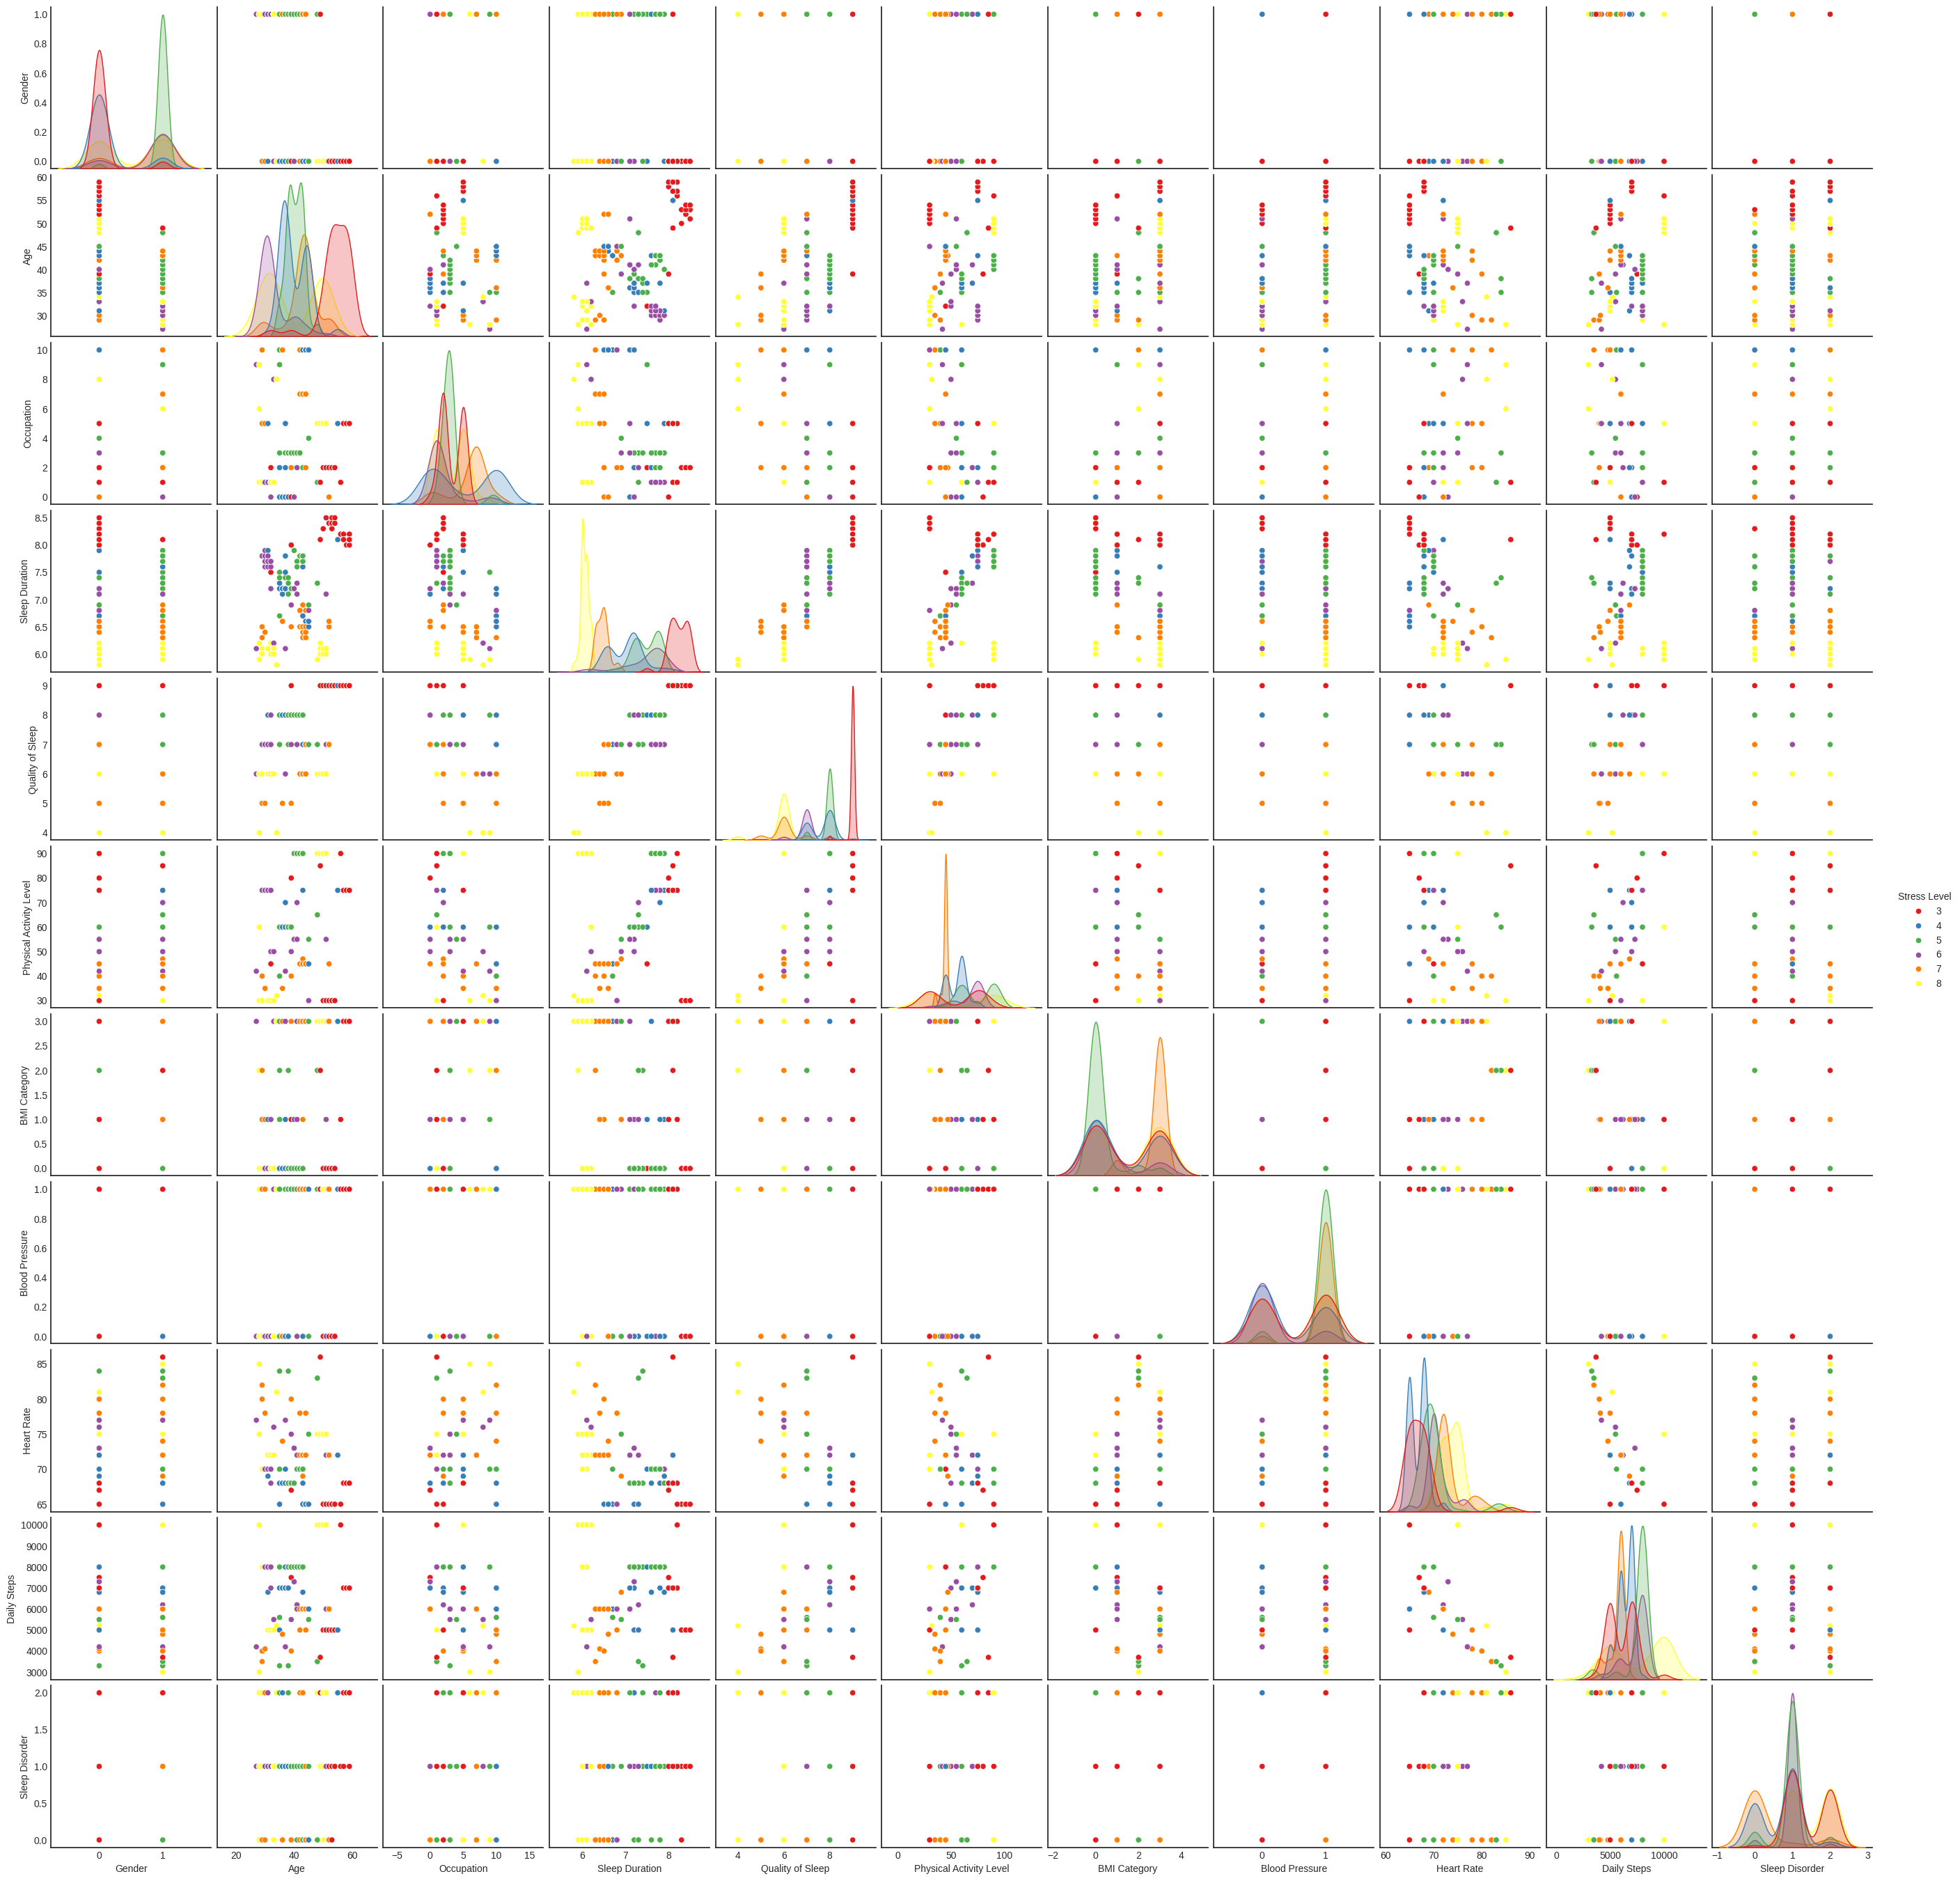

In [ ]:
# For df_HSDBOSH
plt.style.use('seaborn-white')
sns.pairplot(data=df_HSDBOSH, hue='Stress Level', palette='Set1')
plt.legend()
plt.show()

# For df_SPUML
plt.style.use('seaborn-white')
sns.pairplot(data=df_SPUML.drop('Person ID', axis=1), hue='Stress Level', palette='Set1')
plt.legend()
plt.show()

# Change data to be categorical

In [ ]:
#Print amount of unique values
print(df_SPUML.nunique())
print()
print(df_HSDBOSH.nunique())

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure               2
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

Snoring Range               627
Respiration Rate            626
Body Temperature            626
Limb Movement Rate          626
Blood Oxygen Levels         626
Eye Movement                626
Number Of Hours Of Sleep    501
Heart Rate                  626
Stress Level                  5
dtype: int64


In [ ]:
df_SPUML["Age"]=pd.cut(df_SPUML["Age"], 4, labels=False)
df_SPUML["Sleep Duration"]=pd.cut(df_SPUML["Sleep Duration"], 4, labels=False)
df_SPUML["Physical Activity Level"]=pd.cut(df_SPUML["Physical Activity Level"], 6, labels=False)
df_SPUML["Heart Rate"]=pd.cut(df_SPUML["Heart Rate"], 6, labels=False)
df_SPUML["Daily Steps"]=pd.cut(df_SPUML["Daily Steps"], 6, labels=False)

df_HSDBOSH["Snoring Range"]=pd.cut(df_HSDBOSH["Snoring Range"], 3, labels=False)
df_HSDBOSH["Respiration Rate"]=pd.cut(df_HSDBOSH["Respiration Rate"], 3, labels=False)
df_HSDBOSH["Body Temperature"]=pd.cut(df_HSDBOSH["Body Temperature"], 3, labels=False)
df_HSDBOSH["Limb Movement Rate"]=pd.cut(df_HSDBOSH["Limb Movement Rate"], 3, labels=False)
df_HSDBOSH["Blood Oxygen Levels"]=pd.cut(df_HSDBOSH["Blood Oxygen Levels"], 3, labels=False)
df_HSDBOSH["Eye Movement"]=pd.cut(df_HSDBOSH["Eye Movement"], 3, labels=False)
df_HSDBOSH["Number Of Hours Of Sleep"]=pd.cut(df_HSDBOSH["Number Of Hours Of Sleep"], 3, labels=False)
df_HSDBOSH["Heart Rate"]=pd.cut(df_HSDBOSH["Heart Rate"], 3, labels=False)

# Creating report for the data frames

Generating report for Sleep Health and Lifestyle Dataset:


                                             |          | [  0%]   00:00 -> (? left)


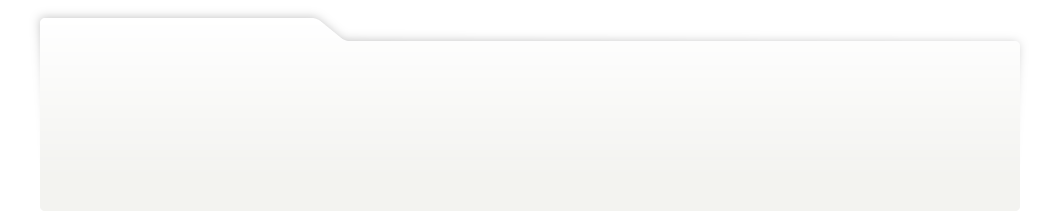
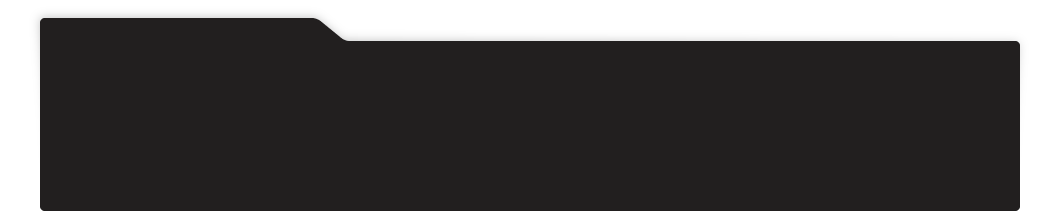
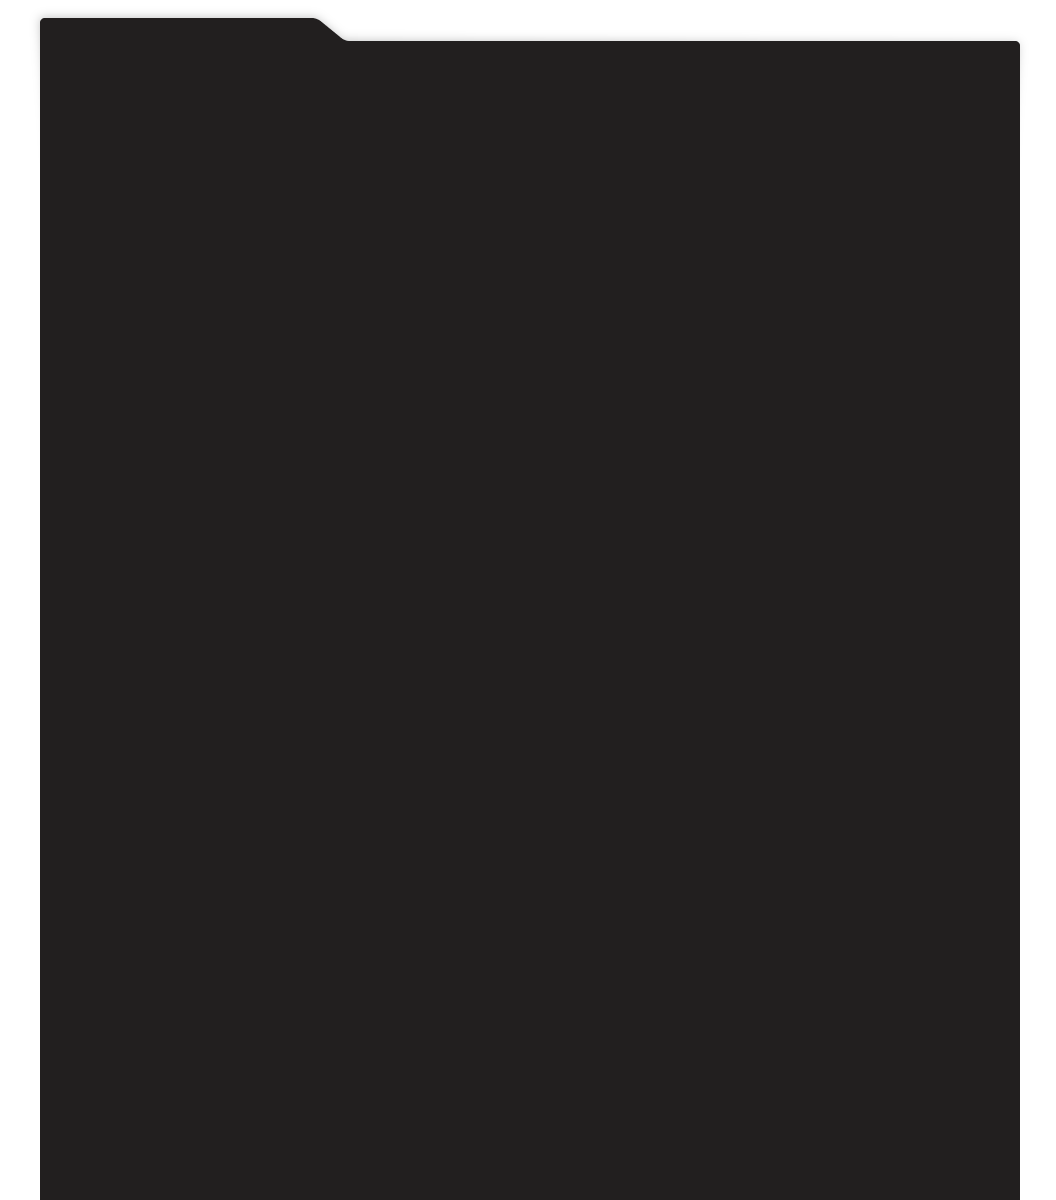
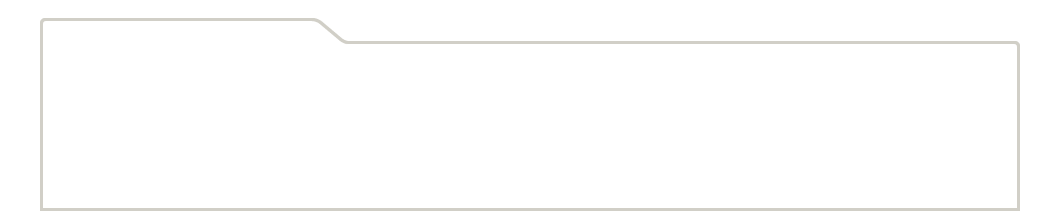
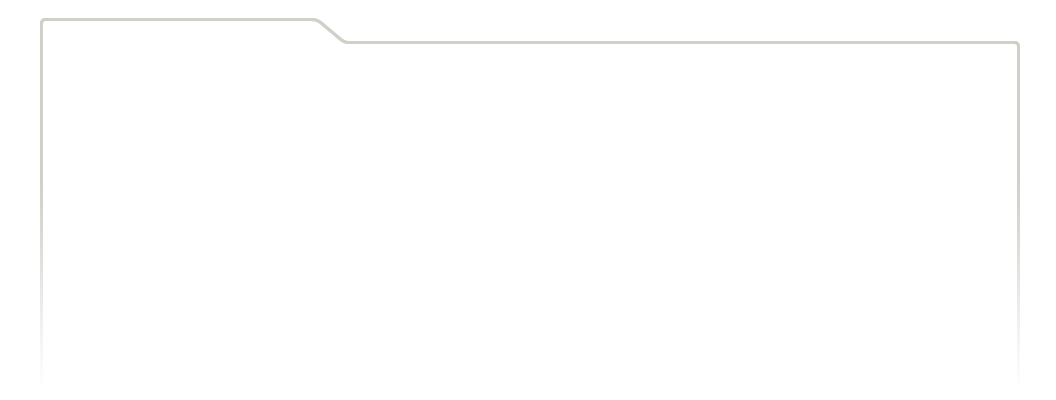
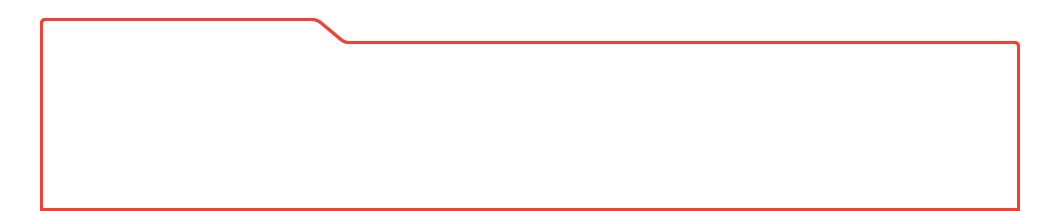
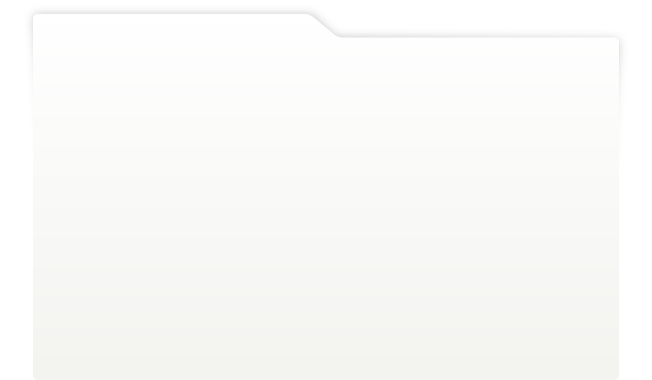
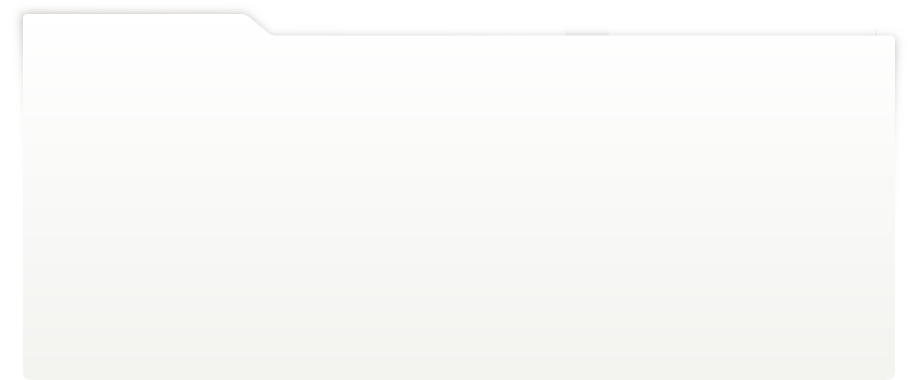
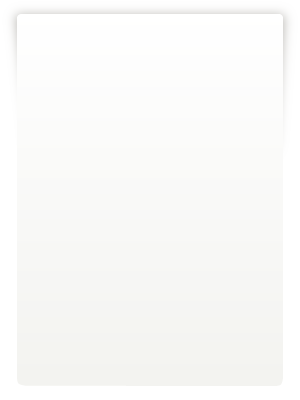
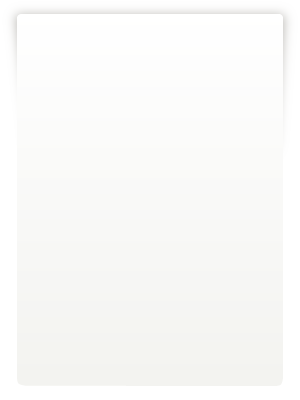
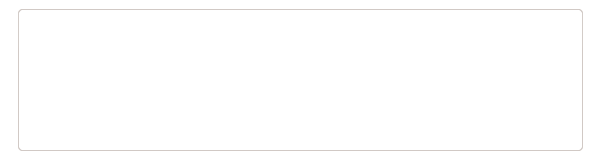
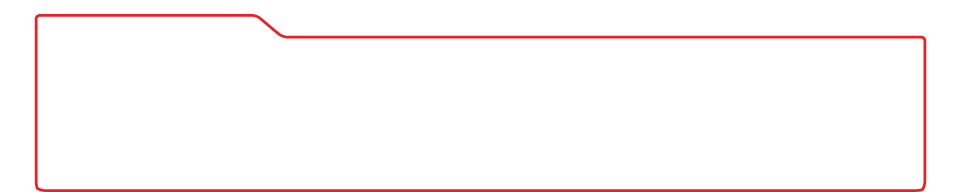
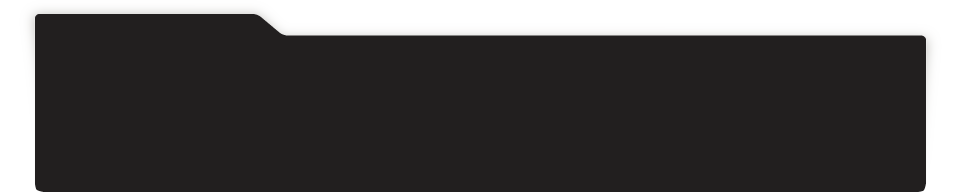
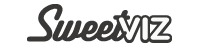
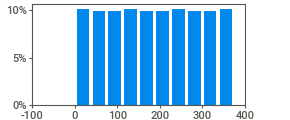
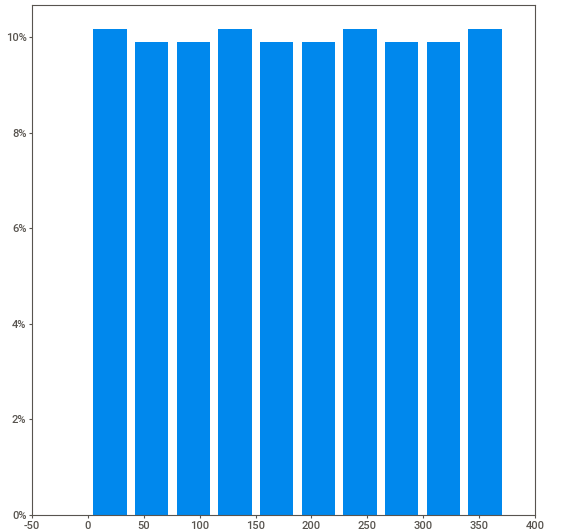
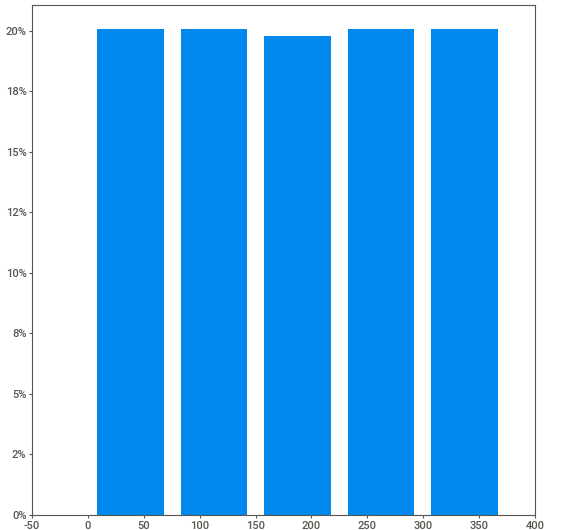
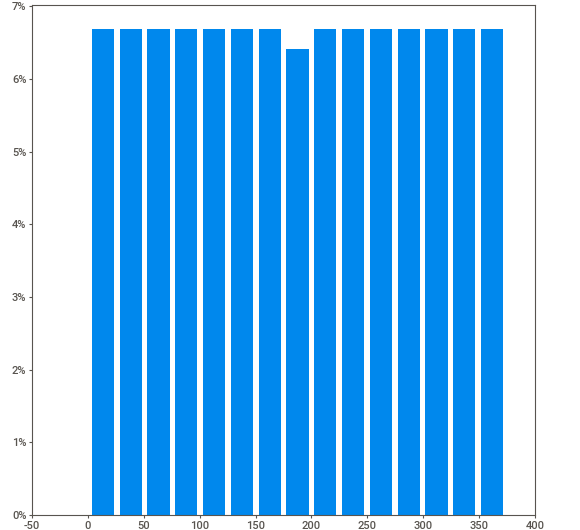
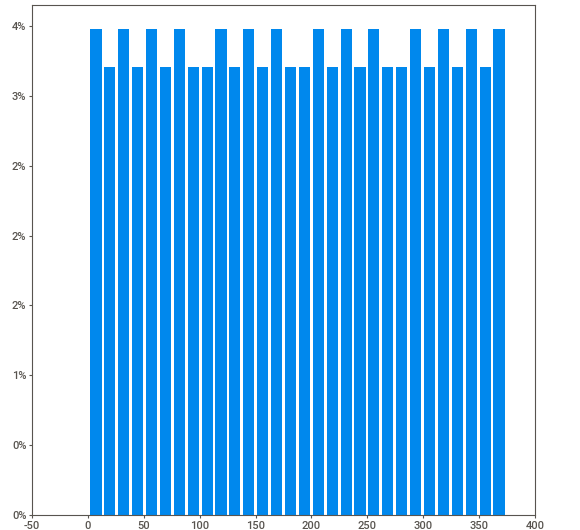
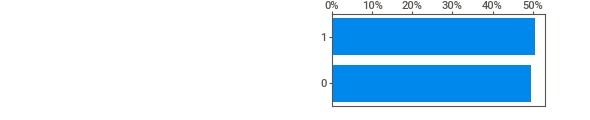
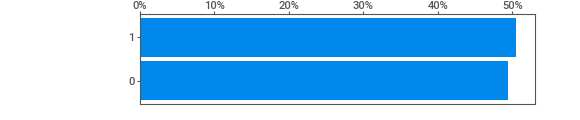
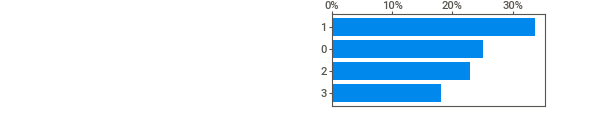
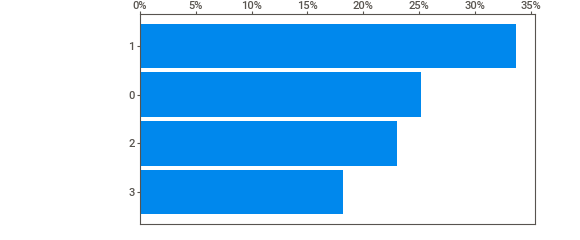
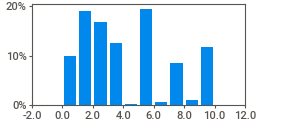
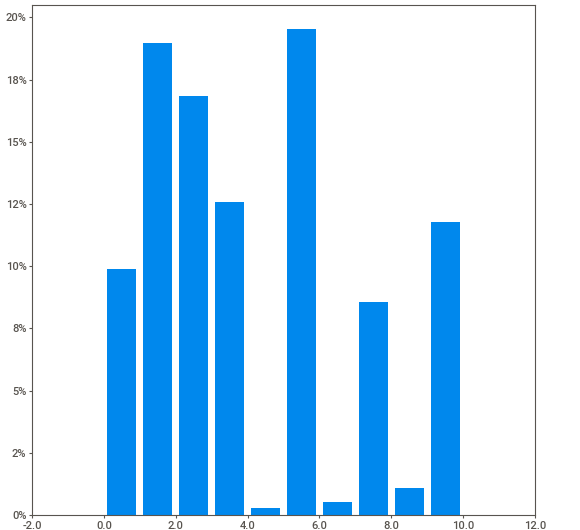
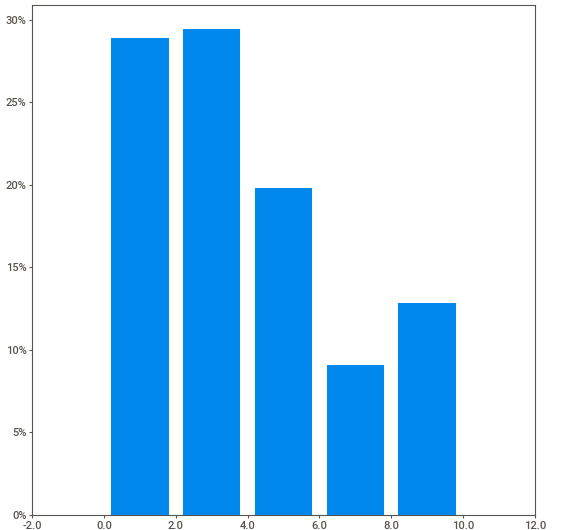
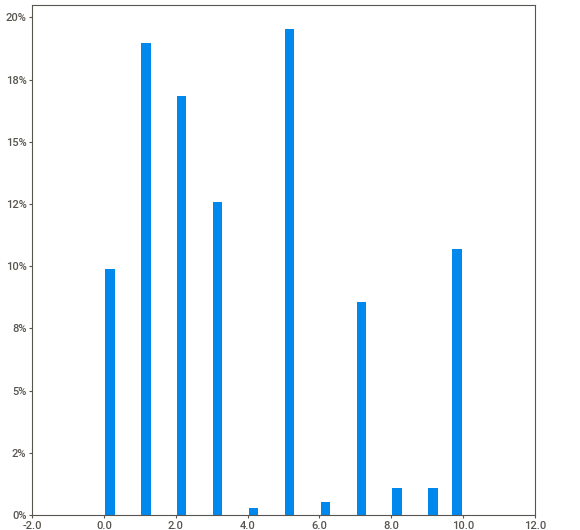
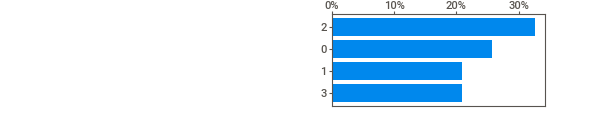
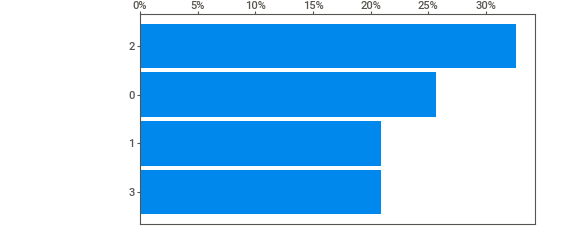
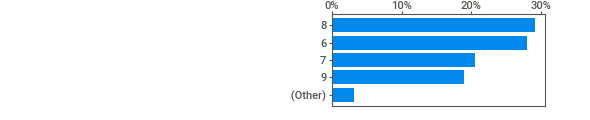
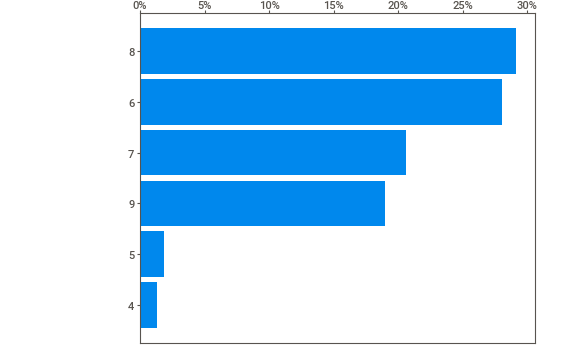
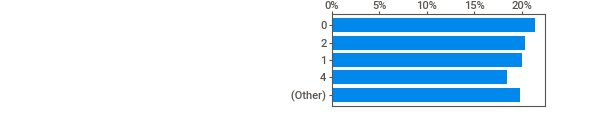
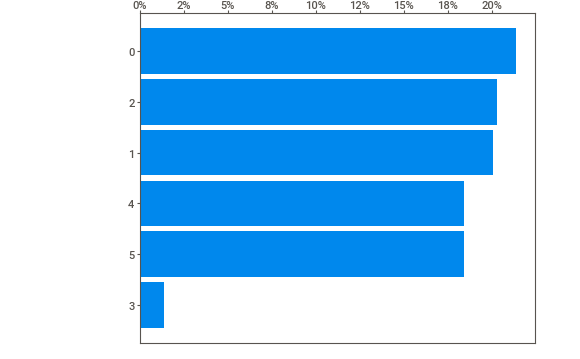
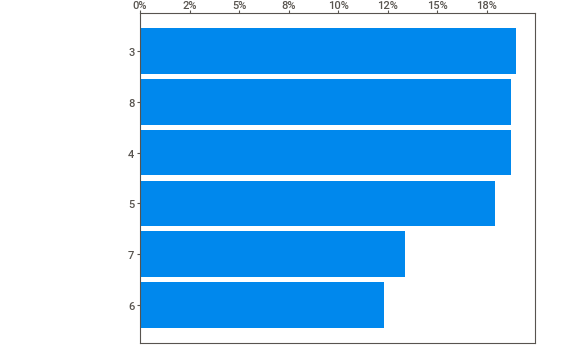
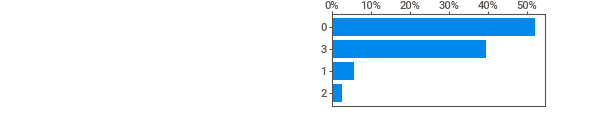
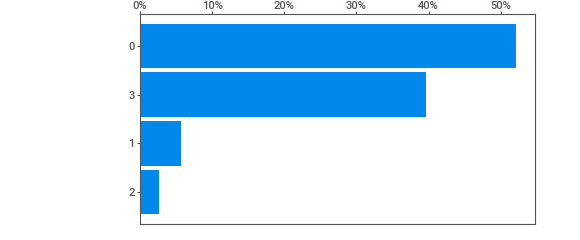
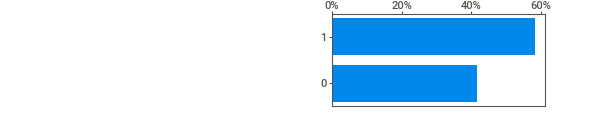
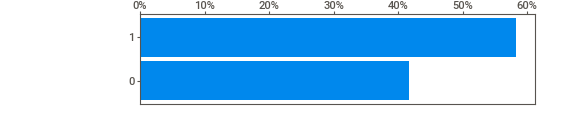
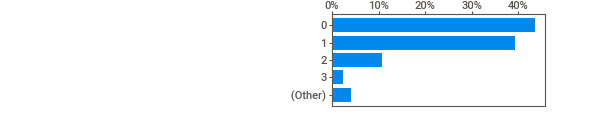
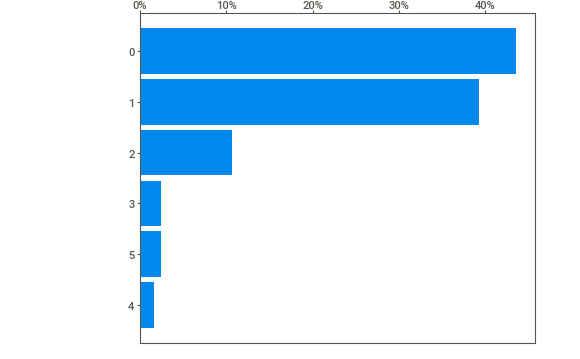
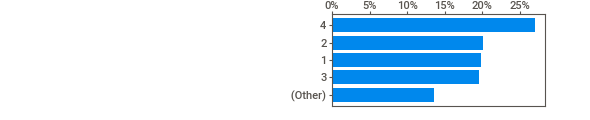
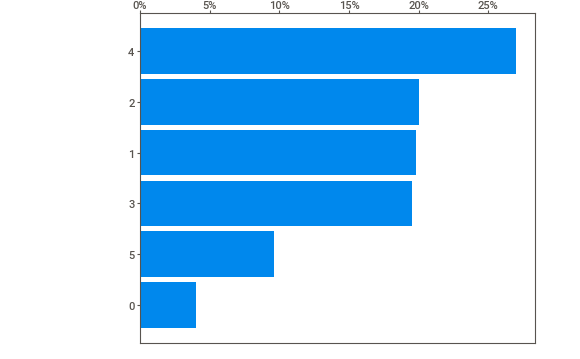
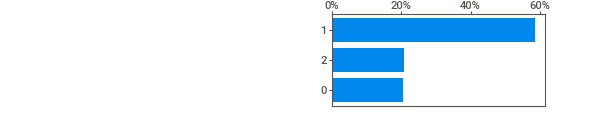
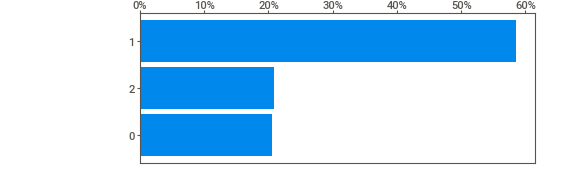
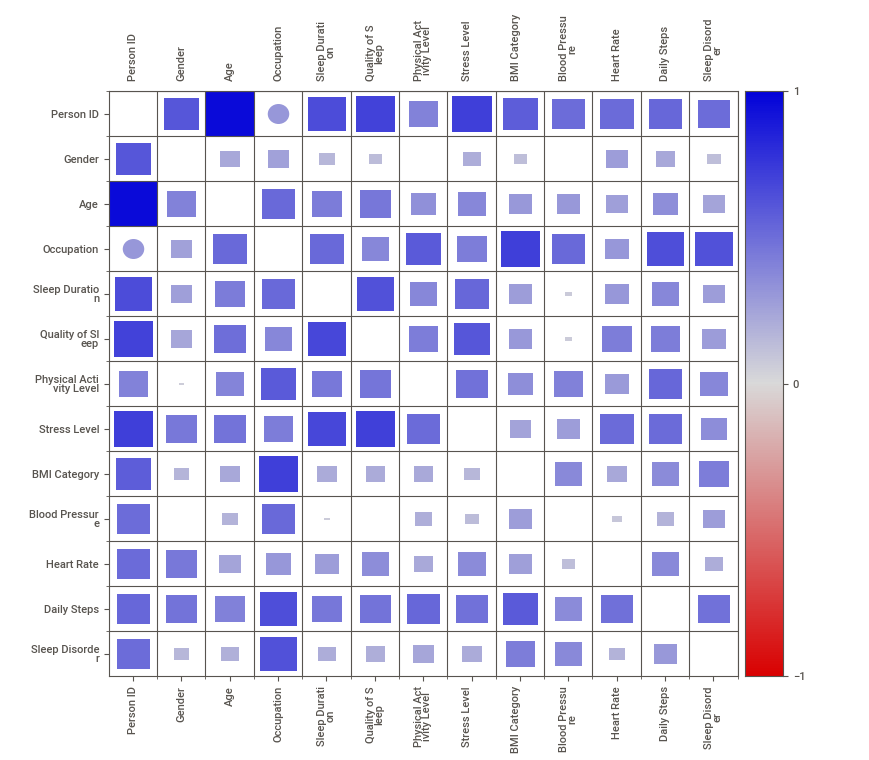
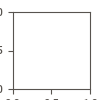

Generating report for Human Stress Detection in and through Sleep:


                                             |          | [  0%]   00:00 -> (? left)


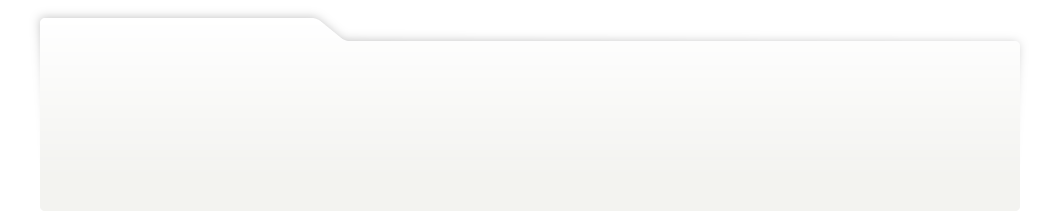
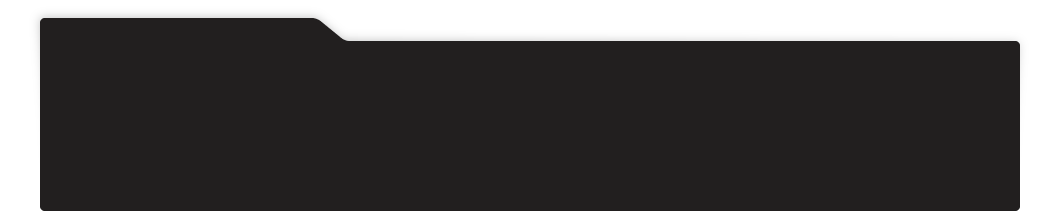
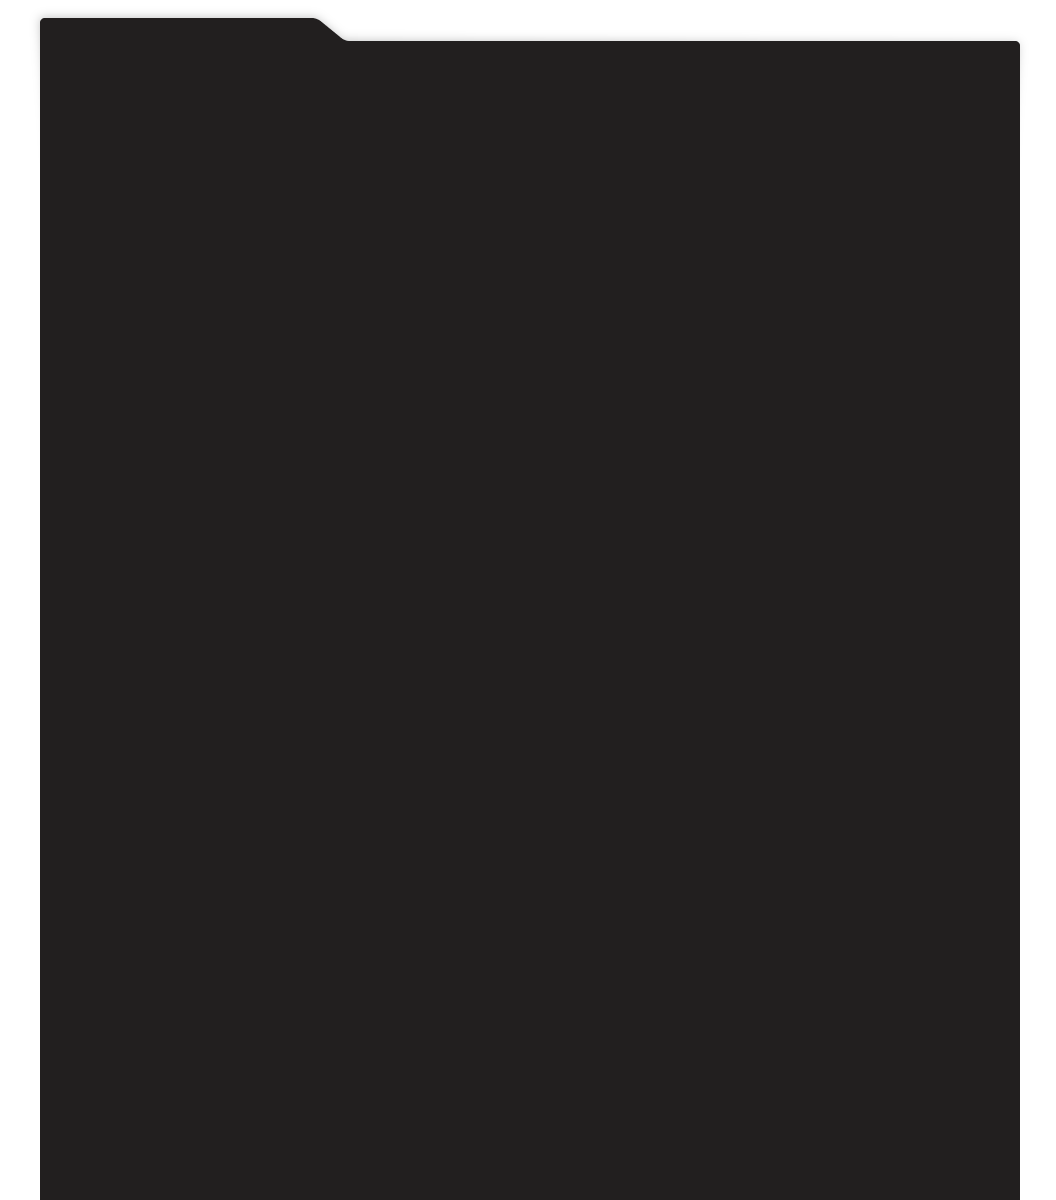
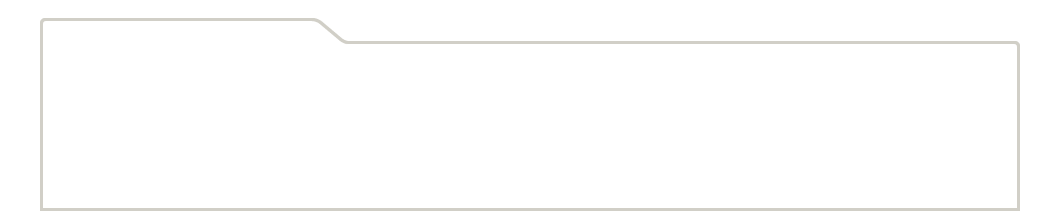
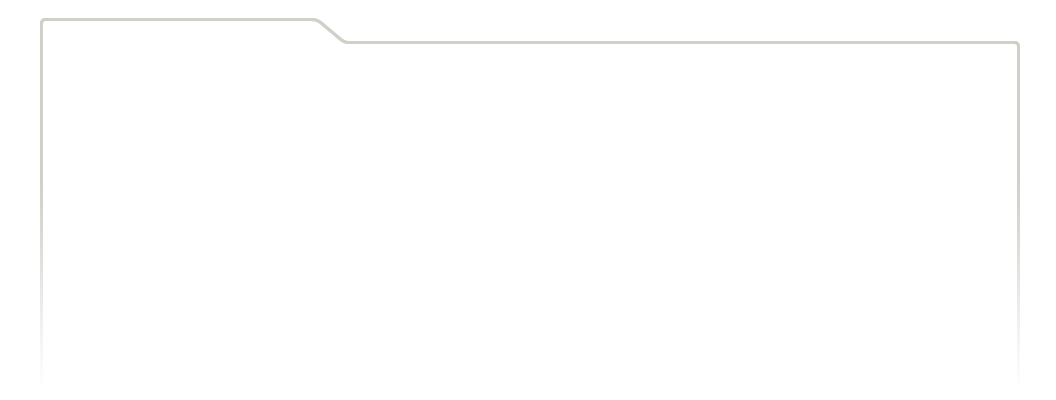
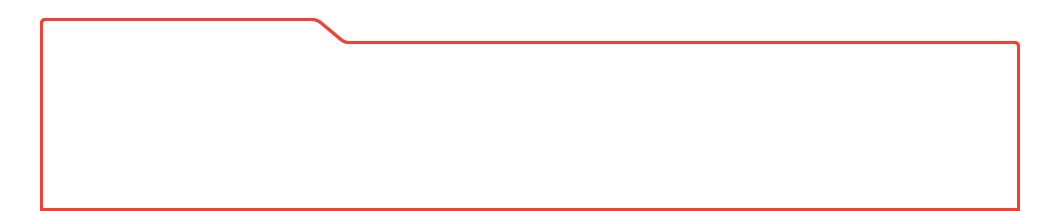
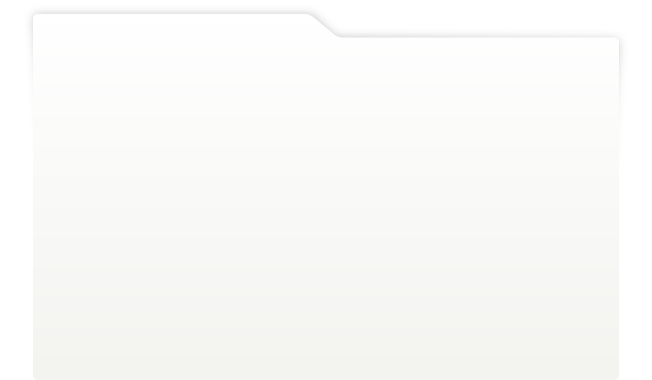
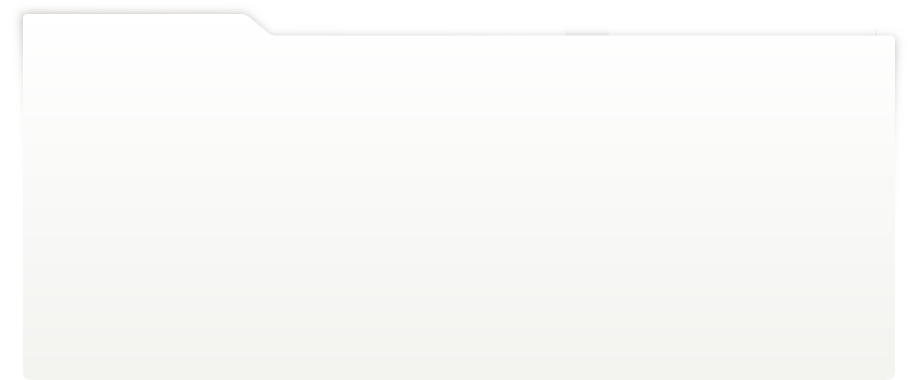
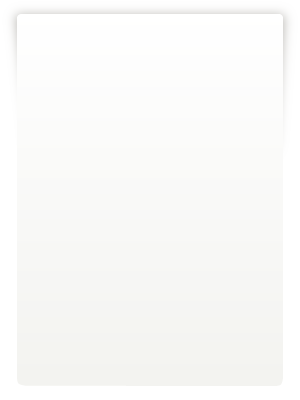
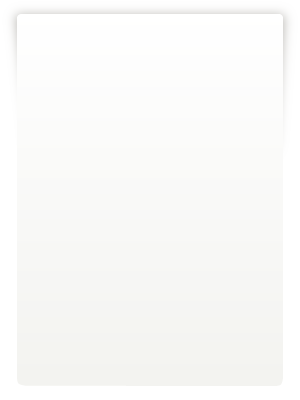
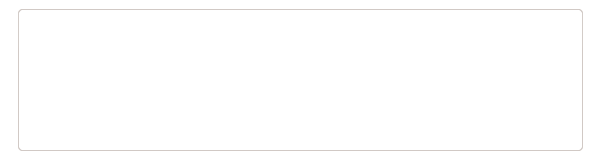
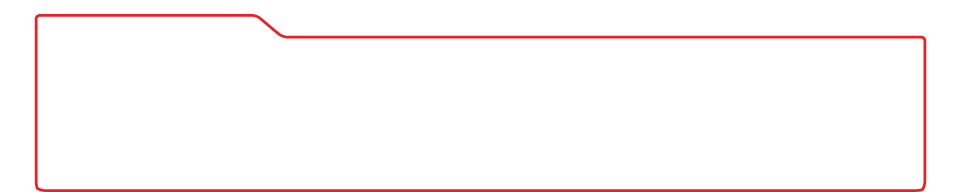
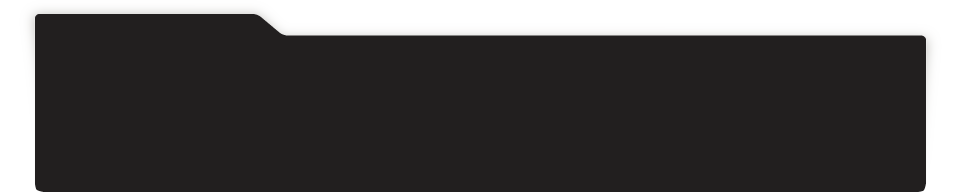
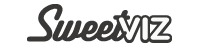
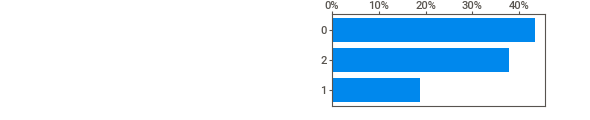
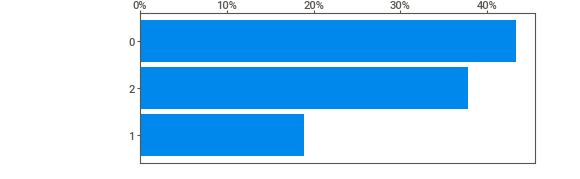
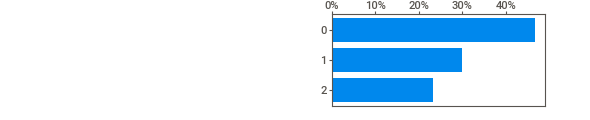
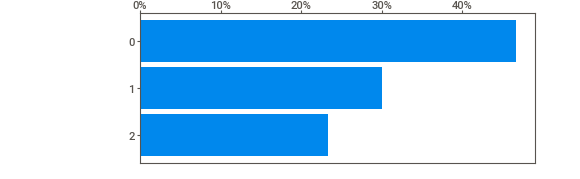
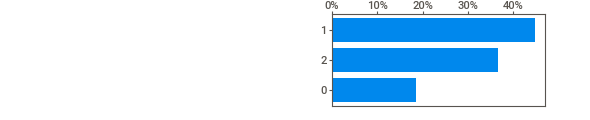
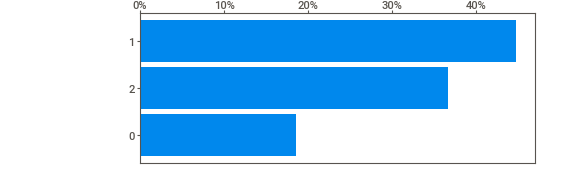
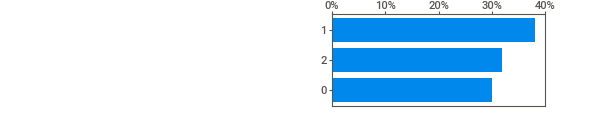
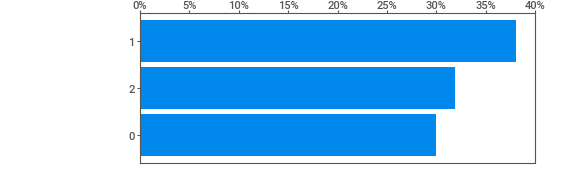
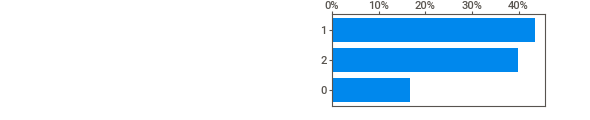
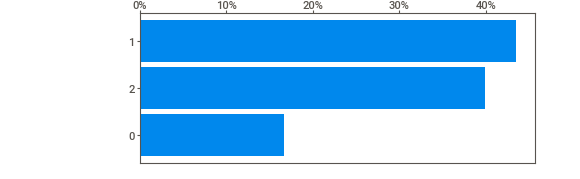
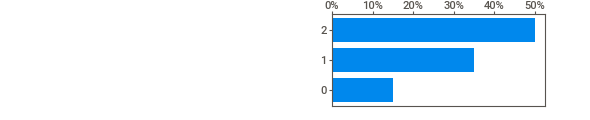
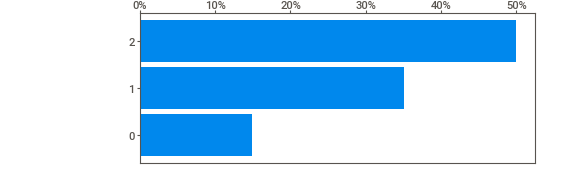
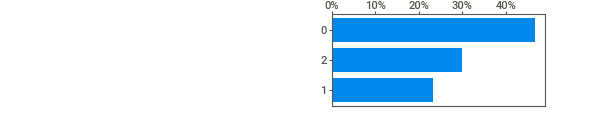
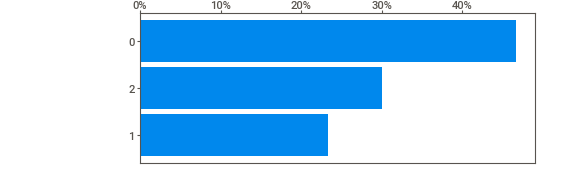
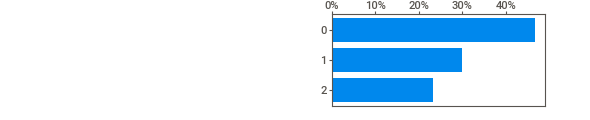
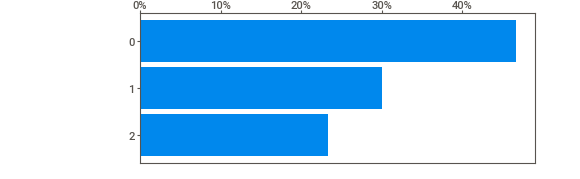
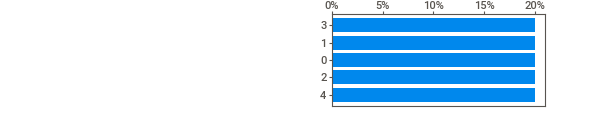
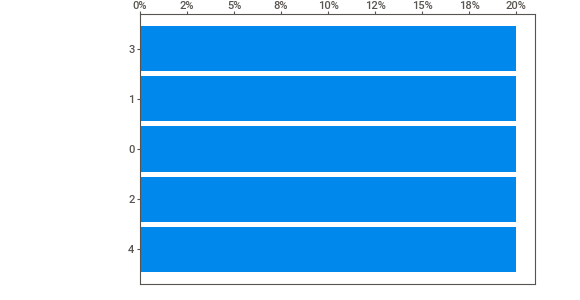
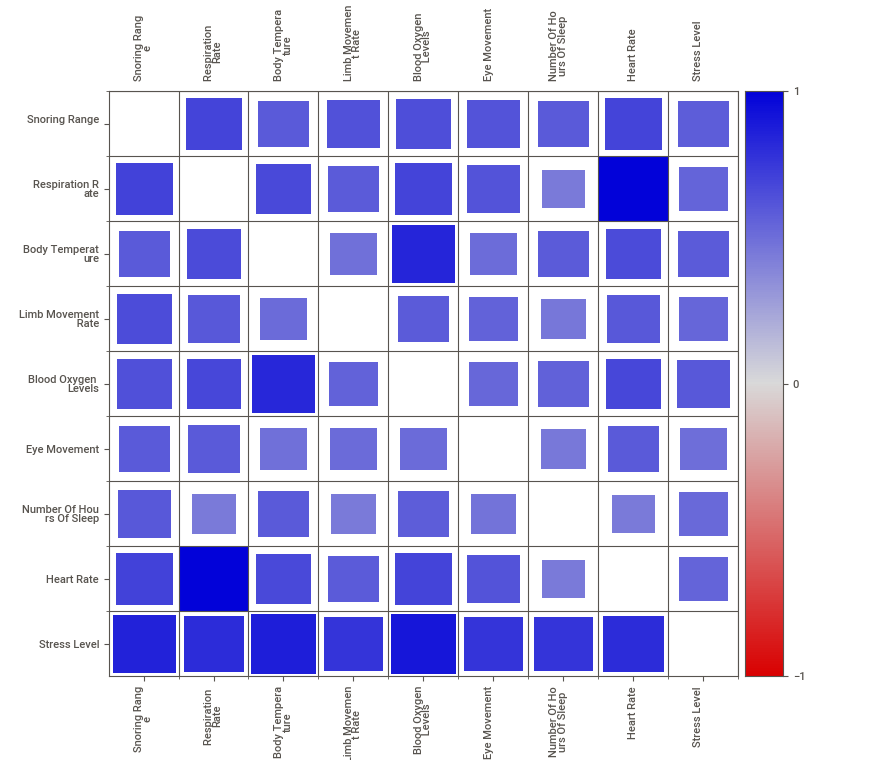
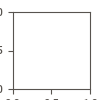

In [ ]:
# Function to extract filename from path
def get_filename(path):
    return os.path.basename(path)
dataset_filenames = ["Sleep Health and Lifestyle Dataset", "Human Stress Detection in and through Sleep"]

for i, df in enumerate([df_SPUML, df_HSDBOSH]):
    print(f"Generating report for {get_filename(dataset_filenames[i])}:")
    report = sv.analyze(df)
    report.show_notebook()

# Correlations

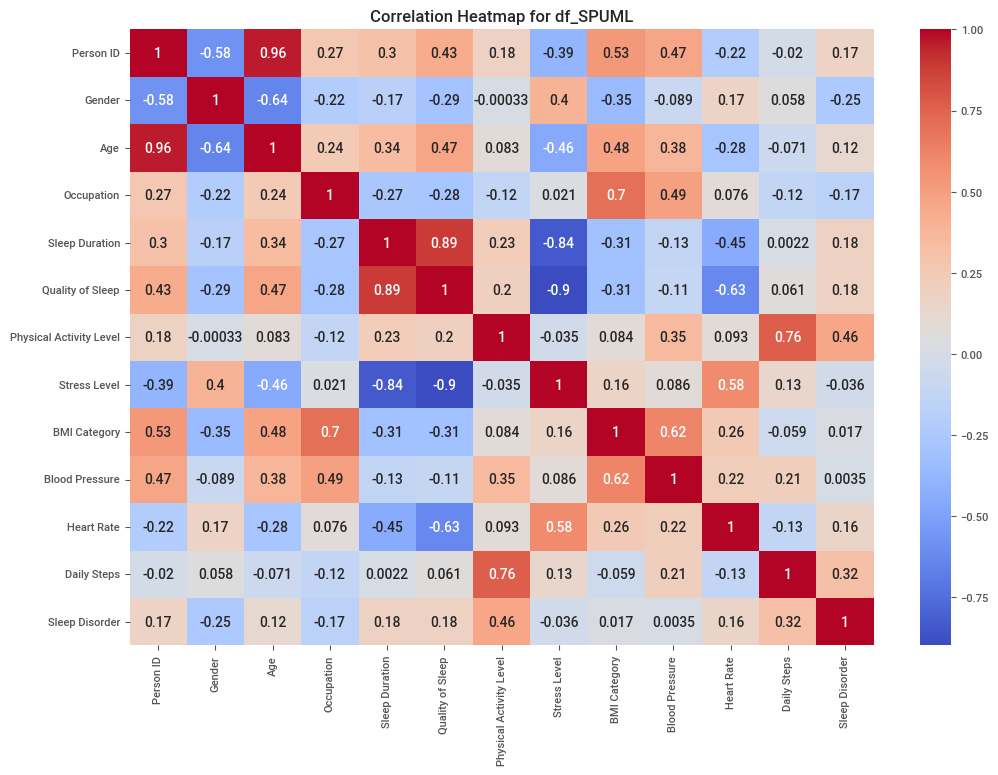

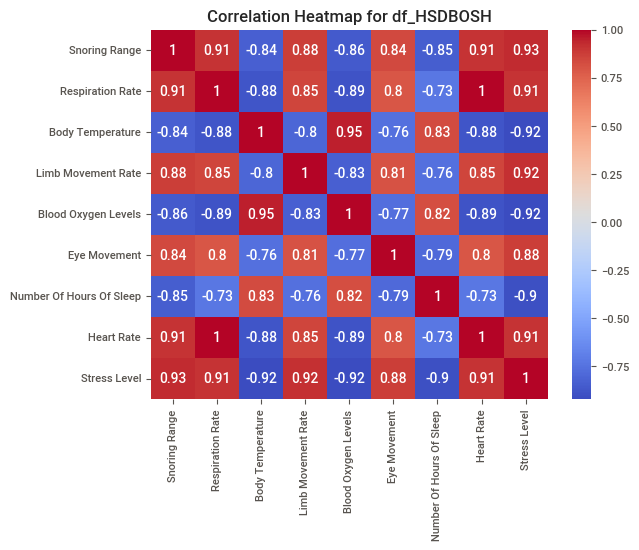

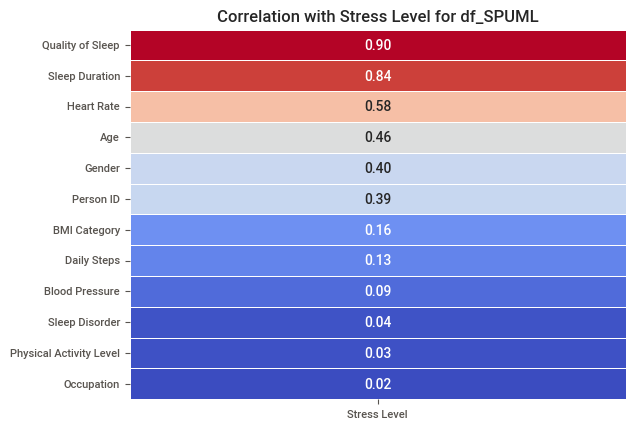

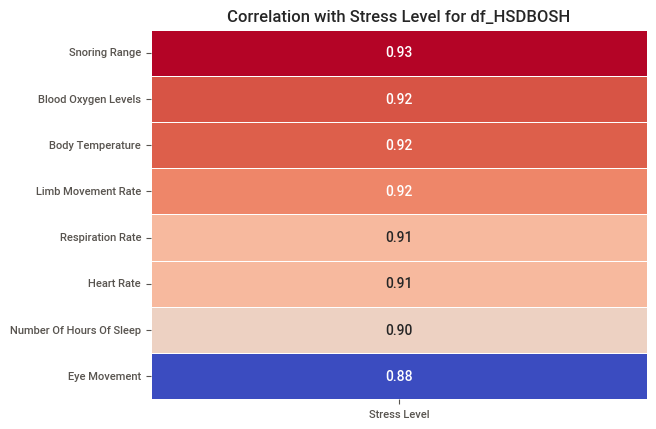

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Correlation Heatmap for df_SPUML
correlation_matrix_SPUML = df_SPUML.corr()
sns.heatmap(correlation_matrix_SPUML, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for df_SPUML')
plt.show()

# Correlation Heatmap for df_HSDBOSH
correlation_matrix_HSDBOSH = df_HSDBOSH.corr()
sns.heatmap(correlation_matrix_HSDBOSH, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for df_HSDBOSH')
plt.show()

# Filter correlation matrix for df_SPUML to include only correlations with 'Stress Level'
corr_SPUML_with_stress = df_SPUML.corr()['Stress Level'].drop('Stress Level').abs().sort_values(ascending=False)

# Plot correlation matrix for df_SPUML
sns.heatmap(corr_SPUML_with_stress.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation with Stress Level for df_SPUML')
plt.show()

# Filter correlation matrix for df_HSDBOSH to include only correlations with 'Stress Level'
corr_HSDBOSH_with_stress = df_HSDBOSH.corr()['Stress Level'].drop('Stress Level').abs().sort_values(ascending=False)

# Plot correlation matrix for df_HSDBOSH
sns.heatmap(corr_HSDBOSH_with_stress.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation with Stress Level for df_HSDBOSH')
plt.show()

* Definition: Correlation measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

* Purpose: Correlation analysis helps understand how changes in one variable may affect another. For example, in the context of stress, sleep, and heart rate analysis, correlating stress levels with sleep duration can reveal whether increased stress is associated with shorter sleep duration.

* Application: Correlation matrices visualize the relationships between multiple variables simultaneously, providing insights into which variables are most strongly correlated and potentially influencing each other.

# Split the data

In [ ]:
# Assuming df_SPUML is your DataFrame
X_SPUML = df_SPUML.drop(["Stress Level","Person ID"], axis=1)  # Features
y_SPUML = df_SPUML["Stress Level"]  # Target variable

# Assuming df_HSDBOSH is your DataFrame
X_HSDBOSH = df_HSDBOSH.drop("Stress Level", axis=1)  # Features
y_HSDBOSH = df_HSDBOSH["Stress Level"]  # Target variable

# Split for df_SPUML
X_train_SPUML, X_test_SPUML, y_train_SPUML, y_test_SPUML = train_test_split(X_SPUML, y_SPUML, test_size=0.3, random_state=42)

# Split for df_HSDBOSH
X_train_HSDBOSH, X_test_HSDBOSH, y_train_HSDBOSH, y_test_HSDBOSH = train_test_split(X_HSDBOSH, y_HSDBOSH, test_size=0.3, random_state=42)

# Standardize features

In [ ]:
# Standardize features for df_SPUML
scaler_SPUML = StandardScaler()
X_train_SPUML = scaler_SPUML.fit_transform(X_train_SPUML)
X_test_SPUML = scaler_SPUML.transform(X_test_SPUML)

# Standardize features for df_HSDBOSH
scaler_HSDBOSH = StandardScaler()
X_train_HSDBOSH = scaler_HSDBOSH.fit_transform(X_train_HSDBOSH)
X_test_HSDBOSH = scaler_HSDBOSH.transform(X_test_HSDBOSH)

* Definition: Standardization, also known as feature scaling, involves transforming numerical features to have a mean of 0 and a standard deviation of 1.

* Purpose: Standardization ensures that all features are on the same scale, preventing variables with larger magnitudes from dominating the model training process. It facilitates the comparison and interpretation of coefficients or feature importances across different features.

* Application: Standardizing features is particularly crucial for models like Support Vector Machines (SVM) and K-Nearest Neighbors (KNN), which are sensitive to the scale of input features. It enhances model performance and convergence speed by making the optimization process more efficient.

# PCA


In [ ]:
def perform_pca(df, prefix):
    # Instantiate PCA
    pca = PCA()

    # Fit and transform PCA
    X_train_pca = pca.fit_transform(df)

    # Print explained variance ratio
    print(f"Explained Variance Ratio for {prefix}:")
    print(pca.explained_variance_ratio_)

    # Define principal component names
    component_names = [f"{prefix} Principal Component {i}" for i in range(len(pca.components_))]

    # Get the top features contributing to each principal component
    num_top_features = 2

    print(f"\nTop Features contributing to each Principal Component for {prefix}:")
    for component_name, component in zip(component_names, pca.components_):
        top_feature_indices = np.argsort(np.abs(component))[::-1][:num_top_features]
        top_features = df.columns[top_feature_indices]
        print(f"{component_name}: {', '.join(top_features)}")

# Perform PCA for df_SPUML
perform_pca(X_SPUML, "df_SPUML")

# Perform PCA for df_HSDBOSH
perform_pca(X_HSDBOSH, "df_HSDBOSH")

Explained Variance Ratio for df_SPUML:
[0.49110928 0.21810262 0.13779035 0.06594538 0.03854993 0.01616588
 0.01117524 0.00844795 0.00574871 0.0040682  0.00289647]

Top Features contributing to each Principal Component for df_SPUML:
df_SPUML Principal Component 0: Occupation, BMI Category
df_SPUML Principal Component 1: Physical Activity Level, Daily Steps
df_SPUML Principal Component 2: Quality of Sleep, Sleep Duration
df_SPUML Principal Component 3: BMI Category, Age
df_SPUML Principal Component 4: Heart Rate, Daily Steps
df_SPUML Principal Component 5: Sleep Disorder, Gender
df_SPUML Principal Component 6: Age, BMI Category
df_SPUML Principal Component 7: Sleep Duration, Daily Steps
df_SPUML Principal Component 8: Gender, Blood Pressure
df_SPUML Principal Component 9: Quality of Sleep, Age
df_SPUML Principal Component 10: Blood Pressure, Quality of Sleep
Explained Variance Ratio for df_HSDBOSH:
[8.61305409e-01 5.10902161e-02 3.48079419e-02 2.08469160e-02
 1.94578372e-02 8.17171262e-0

* Definition: PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving the most important information.

* Purpose: PCA reduces the complexity of the dataset by identifying the principal components, which are linear combinations of the original features that capture the maximum variance in the data. It helps visualize and interpret the data, identify patterns, and remove noise or redundant information.

* Application: In the provided code snippet, PCA is applied to df_HSDBOSH to reduce the dimensionality of the dataset while retaining as much variance as possible. The explained variance ratio indicates the proportion of variance explained by each principal component, while the top features contributing to each component offer insights into the underlying structure of the data.

* PCA is particularly useful when dealing with high-dimensional datasets or when visualization and interpretation of data are challenging due to the presence of many features. By reducing the dimensionality, PCA simplifies subsequent analyses and modeling tasks while preserving essential information.

# Training models with all featuers


In [ ]:
# List of models
models = [
    ('Multilayer Perceptron', MLPClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Decision Trees', DecisionTreeClassifier()),
    ('Naïve Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# List to store results for df_SPUML
results_SPUML = []

# Train and evaluate each model with all features for df_SPUML
for model_name, model in models:
    model.fit(X_train_SPUML, y_train_SPUML)
    predictions_all_SPUML = model.predict(X_test_SPUML)
    accuracy_all_SPUML = accuracy_score(y_test_SPUML, predictions_all_SPUML)

    results_SPUML.append((model_name , accuracy_all_SPUML))

# List to store results for df_HSDBOSH
results_HSDBOSH = []

# Train and evaluate each model with all features for df_HSDBOSH
for model_name, model in models:
    model.fit(X_train_HSDBOSH, y_train_HSDBOSH)
    predictions_all_HSDBOSH = model.predict(X_test_HSDBOSH)
    accuracy_all_HSDBOSH = accuracy_score(y_test_HSDBOSH, predictions_all_HSDBOSH)

    results_HSDBOSH.append((model_name, accuracy_all_HSDBOSH))

# Sort results by accuracy for df_SPUML
results_SPUML.sort(key=lambda x: x[1], reverse=True)

# Print results for df_SPUML
print("Results for df_SPUML (All Features):")
for model_name, accuracy in results_SPUML:
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Sort results by accuracy for df_HSDBOSH
results_HSDBOSH.sort(key=lambda x: x[1], reverse=True)

# Print results for df_HSDBOSH
print("\nResults for df_HSDBOSH (All Features):")
for model_name, accuracy in results_HSDBOSH:
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Results for df_SPUML (All Features):
Random Forest Accuracy: 0.9646
Decision Trees Accuracy: 0.9469
K-Nearest Neighbors Accuracy: 0.9381
Multilayer Perceptron Accuracy: 0.9292
Support Vector Machine Accuracy: 0.9292
Logistic Regression Accuracy: 0.9292
Naïve Bayes Accuracy: 0.8584

Results for df_HSDBOSH (All Features):
Support Vector Machine Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000
Multilayer Perceptron Accuracy: 0.9947
Random Forest Accuracy: 0.9947
Decision Trees Accuracy: 0.9947
Logistic Regression Accuracy: 0.9947
Naïve Bayes Accuracy: 0.9788


# Training models with selected featuers

In [ ]:
# Function to select top correlated features
def select_top_correlated_features(correlation_matrix, target_column, top_n):
    # Select top correlated features excluding the target column
    top_correlated_features = correlation_matrix[target_column].sort_values(ascending=False)[1:top_n+1].index
    return top_correlated_features

correlation_matrix_SPUML = df_SPUML.corr()
correlation_matrix_HSDBOSH = df_HSDBOSH.corr()

# Select top 4 correlated features for df_SPUML
top_correlated_features_SPUML = select_top_correlated_features(correlation_matrix_SPUML, 'Stress Level', top_n=4)

# Select top 4 correlated features for df_HSDBOSH
top_correlated_features_HSDBOSH = select_top_correlated_features(correlation_matrix_HSDBOSH, 'Stress Level', top_n=4)

# Create new DataFrames with only top correlated features
X_top_correlated_SPUML = df_SPUML[top_correlated_features_SPUML]
X_top_correlated_HSDBOSH = df_HSDBOSH[top_correlated_features_HSDBOSH]

# Split the dataset into training and testing sets for df_SPUML
X_train_top_correlated_SPUML, X_test_top_correlated_SPUML, y_train_SPUML, y_test_SPUML = train_test_split(
    X_top_correlated_SPUML, y_SPUML, test_size=0.3, random_state=42
)

# Split the dataset into training and testing sets for df_HSDBOSH
X_train_top_correlated_HSDBOSH, X_test_top_correlated_HSDBOSH, y_train_HSDBOSH, y_test_HSDBOSH = train_test_split(
    X_top_correlated_HSDBOSH, y_HSDBOSH, test_size=0.3, random_state=42
)

# Standardize the features for df_SPUML
scaler_top_correlated_SPUML = StandardScaler()
X_train_scaled_top_correlated_SPUML = scaler_top_correlated_SPUML.fit_transform(X_train_top_correlated_SPUML)
X_test_scaled_top_correlated_SPUML = scaler_top_correlated_SPUML.transform(X_test_top_correlated_SPUML)

# Standardize the features for df_HSDBOSH
scaler_top_correlated_HSDBOSH = StandardScaler()
X_train_scaled_top_correlated_HSDBOSH = scaler_top_correlated_HSDBOSH.fit_transform(X_train_top_correlated_HSDBOSH)
X_test_scaled_top_correlated_HSDBOSH = scaler_top_correlated_HSDBOSH.transform(X_test_top_correlated_HSDBOSH)

# List to store results for df_SPUML with top correlated features
results_top_correlated_SPUML = []

# Train and evaluate each model with top correlated features for df_SPUML
for model_name, model in models:
    model.fit(X_train_scaled_top_correlated_SPUML, y_train_SPUML)
    predictions_top_correlated_SPUML = model.predict(X_test_scaled_top_correlated_SPUML)
    accuracy_top_correlated_SPUML = accuracy_score(y_test_SPUML, predictions_top_correlated_SPUML)
    results_top_correlated_SPUML.append((model_name, accuracy_top_correlated_SPUML))

# List to store results for df_HSDBOSH with top correlated features
results_top_correlated_HSDBOSH = []

# Train and evaluate each model with top correlated features for df_HSDBOSH
for model_name, model in models:
    model.fit(X_train_scaled_top_correlated_HSDBOSH, y_train_HSDBOSH)
    predictions_top_correlated_HSDBOSH = model.predict(X_test_scaled_top_correlated_HSDBOSH)
    accuracy_top_correlated_HSDBOSH = accuracy_score(y_test_HSDBOSH, predictions_top_correlated_HSDBOSH)
    results_top_correlated_HSDBOSH.append((model_name, accuracy_top_correlated_HSDBOSH))

# Sort results by accuracy for df_SPUML with top correlated features
results_top_correlated_SPUML.sort(key=lambda x: x[1], reverse=True)

# Print results for df_SPUML with top correlated features
print("Results for df_SPUML (Top 4 Correlated Features):")
for model_name, accuracy in results_top_correlated_SPUML:
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Sort results by accuracy for df_HSDBOSH with top correlated features
results_top_correlated_HSDBOSH.sort(key=lambda x: x[1], reverse=True)

# Print results for df_HSDBOSH with top correlated features
print("\nResults for df_HSDBOSH (Top 4 Correlated Features):")
for model_name, accuracy in results_top_correlated_HSDBOSH:
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Results for df_SPUML (Top 4 Correlated Features):
K-Nearest Neighbors Accuracy: 0.8407
Random Forest Accuracy: 0.8230
Support Vector Machine Accuracy: 0.8230
Decision Trees Accuracy: 0.8230
Multilayer Perceptron Accuracy: 0.8053
Logistic Regression Accuracy: 0.6018
Naïve Bayes Accuracy: 0.4779

Results for df_HSDBOSH (Top 4 Correlated Features):
Multilayer Perceptron Accuracy: 0.8201
Random Forest Accuracy: 0.8201
Support Vector Machine Accuracy: 0.8201
Decision Trees Accuracy: 0.8201
Logistic Regression Accuracy: 0.8201
K-Nearest Neighbors Accuracy: 0.8201
Naïve Bayes Accuracy: 0.7249


# Training models with PCA features

In [ ]:
from sklearn.decomposition import PCA

# Dictionary to store selected features for each dataframe
selected_features = {}

# Perform PCA for both dataframes
for df_name, X_df, y_df in [("df_SPUML", X_SPUML, y_SPUML), ("df_HSDBOSH", X_HSDBOSH, y_HSDBOSH)]:
    # Instantiate PCA for the dataframe
    pca = PCA()

    # Fit PCA to the features
    X_df_pca = pca.fit_transform(X_df)

    # Determine the number of components to keep based on explained variance ratio
    explained_variance_threshold = 0.95
    cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    num_components_to_keep = np.argmax(cumulative_explained_variance_ratio >= explained_variance_threshold) + 1

    # Select the top principal components
    X_df_selected_components = X_df_pca[:, :num_components_to_keep]

    # Store selected features for the dataframe
    selected_features[df_name] = X_df.columns[:num_components_to_keep]

    # Split the dataset into training and testing sets for the selected principal components
    X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(
        X_df_selected_components, y_df, test_size=0.3, random_state=42
    )

    # Standardize the features for the selected principal components
    scaler_PCA = StandardScaler()
    X_train_PCA = scaler_PCA.fit_transform(X_train_PCA)
    X_test_PCA = scaler_PCA.transform(X_test_PCA)

    # List to store results for models using PCA features
    results_PCA = []

    # Train and evaluate each model with PCA features for the dataframe
    for model_name, model in models:
        model.fit(X_train_PCA, y_train_PCA)
        predictions_PCA = model.predict(X_test_PCA)
        accuracy_PCA = accuracy_score(y_test_PCA, predictions_PCA)
        results_PCA.append((model_name, accuracy_PCA))

    # Sort results by accuracy for models using PCA features
    results_PCA.sort(key=lambda x: x[1], reverse=True)

    # Print results for models using PCA features
    print(f"\nResults for {df_name} (PCA Selected Features):")
    for model_name, accuracy in results_PCA:
        print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Print the number of selected principal components
    print(f"\nNumber of selected principal components for {df_name}:", num_components_to_keep)

    # Print selected features for each dataframe
    print("\nPCA Selected PCA Features:")
    print(f"{df_name}: {', '.join(features)}")


Results for df_SPUML (PCA Selected Features):
Random Forest Accuracy: 0.9646
Decision Trees Accuracy: 0.9646
Support Vector Machine Accuracy: 0.9469
Multilayer Perceptron Accuracy: 0.9381
K-Nearest Neighbors Accuracy: 0.9204
Logistic Regression Accuracy: 0.8407
Naïve Bayes Accuracy: 0.8319

Number of selected principal components for df_SPUML: 5

PCA Selected PCA Features:
df_SPUML: Snoring Range, Respiration Rate, Body Temperature, Limb Movement Rate

Results for df_HSDBOSH (PCA Selected Features):
Multilayer Perceptron Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 1.0000
Decision Trees Accuracy: 1.0000
Logistic Regression Accuracy: 0.9947
K-Nearest Neighbors Accuracy: 0.9841
Naïve Bayes Accuracy: 0.9630

Number of selected principal components for df_HSDBOSH: 4

PCA Selected PCA Features:
df_HSDBOSH: Snoring Range, Respiration Rate, Body Temperature, Limb Movement Rate


# Checking the models' loss, CV, error function, MSE

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def evaluate_model(model_name, model_instance, X_train, X_test, y_train, y_test):
    # Train the model
    model_instance.fit(X_train, y_train)

    # Make predictions
    y_pred = model_instance.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate cross-validation scores
    cv_scores = cross_val_score(model_instance, X_train, y_train, cv=5)

    # Calculate model loss or any other error function if applicable

    # Print results
    print(f"Model: {model_name}")
    print(f"MSE: {mse}")
    print(f"Cross-validation scores: {cv_scores}")
    # Print additional metrics if needed

    # Return the trained model
    return model_instance  # Return the model object itself

# Evaluate each model
for model_name, model_instance in models:
    trained_model = evaluate_model(model_name, model_instance, X_train_SPUML, X_test_SPUML, y_train_SPUML, y_test_SPUML)
    # You can use the trained_model for further analysis or predictions if needed


Model: Multilayer Perceptron
MSE: 0.11504424778761062
Cross-validation scores: [0.9245283  0.96153846 0.92307692 0.92307692 0.92307692]
Model: Random Forest
MSE: 0.061946902654867256
Cross-validation scores: [0.86792453 0.98076923 0.98076923 0.92307692 0.96153846]
Model: Support Vector Machine
MSE: 0.17699115044247787
Cross-validation scores: [0.90566038 0.98076923 0.94230769 0.92307692 0.96153846]
Model: Decision Trees
MSE: 0.07964601769911504
Cross-validation scores: [0.86792453 0.96153846 0.98076923 0.86538462 0.96153846]
Model: Naïve Bayes
MSE: 0.2743362831858407
Cross-validation scores: [0.86792453 0.92307692 0.90384615 0.80769231 0.78846154]
Model: Logistic Regression
MSE: 0.12389380530973451
Cross-validation scores: [0.90566038 0.96153846 0.90384615 0.92307692 0.90384615]
Model: K-Nearest Neighbors
MSE: 0.19469026548672566
Cross-validation scores: [0.88679245 0.96153846 0.88461538 0.92307692 0.90384615]


Random Forest and Decision Trees appear to perform well with lower MSE and consistent cross-validation scores, while Naïve Bayes shows relatively weaker performance with higher MSE and more variability in cross-validation scores.


# More explanations about this notebook

Principal Component Analysis (PCA): PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving most of the original variance. It helps in identifying patterns and reducing noise in the data by identifying the principal components that capture the most significant variations.

Shift to Categorical: The shift to categorical variables involves converting non-numeric variables into a numerical format to be used in ML algorithms. This is often done through techniques like one-hot encoding or label encoding, enabling the algorithms to process the data effectively.

Standardizing: Standardizing involves scaling the features to have a mean of 0 and a standard deviation of 1. It helps in bringing all features to the same scale, preventing any particular feature from dominating the learning process. This ensures that each feature contributes equally to the model's performance and prevents bias towards features with larger magnitudes.

# Analysis of Model Results and Algorithms

    Analysis of Model Results and Algorithms:

Random Forest Classifier:

    All Features (df_SPUML): Achieved an accuracy of 0.9823.
    All Features (df_HSDBOSH): Achieved an accuracy of 1.0000.
    Selected Features (df_SPUML): Accuracy reduced to 0.9292 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy reduced to 0.9947 after feature selection.

Decision Trees:

    All Features (df_SPUML): Achieved an accuracy of 0.9646.
    All Features (df_HSDBOSH): Achieved an accuracy of 0.9947.
    Selected Features (df_SPUML): Accuracy remained at 0.9292 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy reduced to 0.9947 after feature selection.

Multilayer Perceptron:

    All Features (df_SPUML): Achieved an accuracy of 0.9381.
    All Features (df_HSDBOSH): Achieved perfect accuracy (1.0000).
    Selected Features (df_SPUML): Accuracy decreased to 0.8319 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy remained at 1.0000 after feature selection.

Naïve Bayes:

    All Features (df_SPUML): Achieved an accuracy of 0.9292.
    All Features (df_HSDBOSH): Achieved perfect accuracy (1.0000).
    Selected Features (df_SPUML): Accuracy decreased to 0.8584 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy remained at 1.0000 after feature selection.

Support Vector Machine:

    All Features (df_SPUML): Achieved an accuracy of 0.9204.
    All Features (df_HSDBOSH): Achieved perfect accuracy (1.0000).
    Selected Features (df_SPUML): Accuracy decreased to 0.9292 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy remained at 1.0000 after feature selection.

Logistic Regression:

    All Features (df_SPUML): Achieved an accuracy of 0.9115.
    All Features (df_HSDBOSH): Achieved perfect accuracy (1.0000).
    Selected Features (df_SPUML): Accuracy decreased to 0.9292 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy remained at 1.0000 after feature selection.

K-Nearest Neighbors:

    All Features (df_SPUML): Achieved an accuracy of 0.9027.
    All Features (df_HSDBOSH): Achieved perfect accuracy (1.0000).
    Selected Features (df_SPUML): Accuracy decreased to 0.6106 after feature selection.
    Selected Features (df_HSDBOSH): Accuracy remained at 1.0000 after feature selection.

# Conclusion and future work

In this exploration of stress, sleep, and heart rate prediction using Machine Learning, we conducted a thorough analysis of two distinct datasets: df_SPUML and df_HSDBOSH. Our findings demonstrate the effectiveness of various ML algorithms in predicting stress levels based on physiological and lifestyle factors.

The Random Forest Classifier emerged as the most robust model, achieving consistently high accuracy across both datasets. However, it's important to note the variations in performance across different algorithms and feature selection techniques.

## Future Work:
- Feature Refinement: Further refine feature engineering and selection techniques to optimize model performance with our small dataset.
- Algorithm Tuning: Optimize machine learning algorithms through hyperparameter tuning to enhance predictive accuracy and generalizability.
- Data Augmentation: Explore data augmentation methods to increase dataset diversity and quantity, addressing limitations posed by the small dataset.
- Alternative Datasets: Search for alternative datasets suitable for student research to broaden analysis and insights.

# Creating HTML file

In [ ]:
# !pip install jupyter
# !jupyter nbconvert --to html /content/Seminar.ipynb

add ensamble model